# Advanced Leaspy Utilisation

This is already the last practical session of the day ! Be carefull you only have an __hour and a half__.

## Objectives : 
- Understand data format that is needed to use Leaspy,
- Learn to use parameters
- Explore models selection

## The set-up

As before, if you have followed the [installation details](https://gitlab.com/icm-institute/aramislab/disease-course-mapping-solutions) carefully, you should 

- be running this notebook in the `leaspy_tutorial` virtual environment
- having all the needed packages already installed

<span style='color: #a13203; font-weight: 600;'>💬 Question 1 💬</span> __Run the following command lines.__

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy import stats
%matplotlib inline

from leaspy import Leaspy, IndividualParameters, AlgorithmSettings, Data

## Part I: The prediction

One of the main issue of Parkinson disease specialized doctor is that they do not know how fast will the disease evolved and then are unable to set the right spacing between two visits wih their patients. In addition, they would like to give advises to their patients for them to anticipate administrative obligations by the time they are still able to do them. The most important score to monitore is MDS3_off_total, but it is always nice to have a some others. 

Leaspy could be a great tool to help solving those issues. The following part contains the main structure to train and test a leaspy model.

### I.1. Prepare your data

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Two datasets, containing 200 patients, are available :
* __learn_leaspy2__ : contains historic data of patients visits,
* __pred_leaspy2__ : contains the next visit for each patient, that it would be nice to predict.

<span style='color: #a13203; font-weight: 600;'>💬 Question 2 💬</span> __Run the following command lines to load the data.__

In [83]:
data_path = os.path.join(os.getcwd(),'..','data/TP3_advanced_leaspy/')
df = pd.read_csv(data_path + "learn_leaspy2.csv")
df.set_index(['ID', 'TIME'], inplace=True)
df.head()

MDS1_total  MDS2_total  MDS3_off_total  SCOPA_total  \
ID     TIME                                                             
GS-001 62.289333         NaN    3.556297       -9.000000     0.000000   
       62.789333    4.644412    6.570468       15.658805     5.721043   
       63.289333    1.955755    2.621946       29.142870     0.000000   
       64.289330         NaN    0.000000       44.319816    44.560006   
       64.789330    4.169568    4.752366       29.652244     0.000000   

                  MOCA_total  PUTAMEN_R  PUTAMEN_L  CAUDATE_R  CAUDATE_L  \
ID     TIME                                                                
GS-001 62.289333   26.784926   0.168703   0.140237   0.069723   0.041532   
       62.789333   25.303684   0.146405   0.172067   0.034234   0.089805   
       63.289333   30.000000   0.163331   0.188258   0.069586   0.060110   
       64.289330   29.851244   0.185705   0.177019   0.053399   0.076220   
       64.789330   28.533121   0.194951   0.171595   0.048021   0.083921   

                  AGD_total  
ID     TIME                  
GS-001 62.289333   0.078704  
       62.789333   0.374873  
       63.289333   0.194420  
       64.289330   0.237782  
       64.789330   0.159916

In [84]:
df_vis = pd.read_csv(data_path + "pred_leaspy2.csv")
df_vis.set_index(['ID'], inplace=True)
df_vis.head()

,TIME,MDS1_total,MDS2_total,MDS3_off_total,SCOPA_total,MOCA_total,PUTAMEN_R,PUTAMEN_L,CAUDATE_R,CAUDATE_L,AGD_total
ID,,,,,,,,,,,
GS-001,69.089333,4.960370,5.635592,45.674665,13.727753,27.915718,0.209688,0.229443,0.105179,0.137542,0.319582
GS-002,73.647736,14.674264,9.983259,48.461299,1.777607,19.778270,0.268539,0.211596,0.196772,0.193251,0.404642
GS-003,62.491299,NaN,9.429927,-9.000000,27.019072,24.602786,0.182493,0.151622,0.056601,0.096034,0.347589
GS-004,67.666000,7.170177,3.978171,7.608285,0.000000,27.879789,0.223414,0.185168,0.186051,0.182661,0.312880
GS-005,74.125290,NaN,3.628875,-9.000000,3.493040,28.498334,0.197911,0.189411,0.114025,0.122356,0.336951


<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> You have the following informations about scores :
* __MDS1_total__ : increasing score from 0 to 52,
* __MDS2_total__ : increasing score from 0 to 52,
* __MDS3_off_total__ : increasing score from 0 to 132,
* __SCOPA_total__ : increasing score from 0 to 72,
* __MOCA_total__ : decreasing score from 30 to 0,
* __AGD_total__ : unknown positive score (will need to be explored),
* __Others__ : the rest are imaging increasing score and then have no border, except that they are suppose to be positive. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 3 💬</span> __Plot histogram to check that the data are as expected.__

In [4]:
# To complete

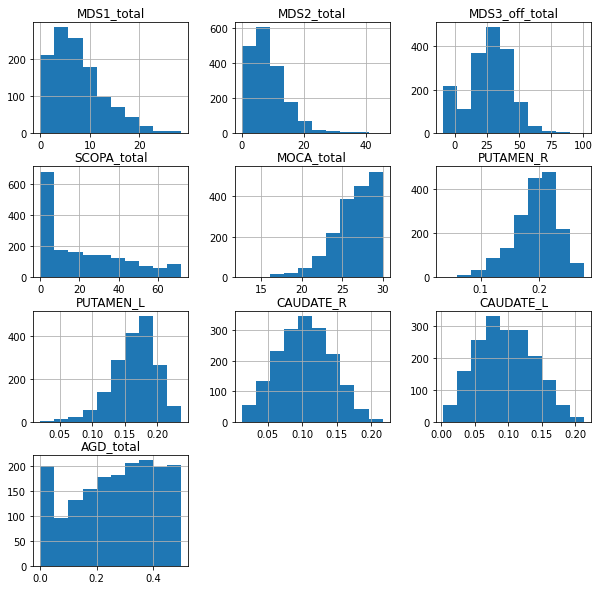

In [85]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df.hist(figsize = (10,10))
plt.show()

<span style='color: #a13203; font-weight: 600;'>💬 Question 4 💬</span> __Check that the variables respect the constraints. How can you interpret those unexpected datas ?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 5 💬</span> __Apply the right pre-processing to those unexpected data. Do not forget to apply it on ALL the data.__

In [6]:
# To complete

In [86]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df = df.replace(-9,np.nan)
df_vis = df_vis.replace(-9,np.nan)

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Leaspy model is able to handle NaN, but it is always important to quantify them.

<span style='color: #a13203; font-weight: 600;'>💬 Question 6 💬</span> __Return the number of NaN by feature.__

In [8]:
# To complete

In [9]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df.isna().sum()

MDS1_total        596
MDS2_total          0
MDS3_off_total    196
SCOPA_total         0
MOCA_total          0
PUTAMEN_R           0
PUTAMEN_L           0
CAUDATE_R           0
CAUDATE_L           0
AGD_total           0
dtype: int64

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Leaspy model only takes normalised increasing with time data.

<span style='color: #a13203; font-weight: 600;'>💬 Question 7 💬</span> __Using the functions below, explore AGD_total to try to understand its progression and compare it to other features.__

In [87]:
def plot_individuals(df, feature,  sublist=None):
    plt.figure(figsize=(12, 6))
    
    if sublist is None:
        sublist = df.index.unique('ID')
        
    colors =  sns.color_palette(palette='icefire', n_colors=len(sublist), desat=None, as_cmap=False)
    
    for c, idx in zip(colors, sublist):
        indiv_df = df.loc[idx]
        
        ages = indiv_df.index.get_level_values(0)
        real_values = indiv_df[feature].values
        plt.plot(ages, real_values, c=c)
        plt.xlabel("Age in years")
        plt.ylabel(feature)
        plt.title("Evolution for each patient of " + feature)
        
        
def individual_linear_regression_against_time(df, feature):
    
    # individual linear regressions on each feature, to study individual progression (with linear regression against age)
    lin_reg_on_frame_time_y = lambda t: pd.Series(dict(zip(['slope','intercept','correl_coef','pval','stderr','intercept_stderr'], 
                                                        stats.linregress(t.values))))
    
    
    # select individuals with at least 3 visits
    s = df[feature].dropna()
    nb_visits_with_data = s.groupby('ID').size()
    s = s.loc[nb_visits_with_data[nb_visits_with_data >= 3].index]
    
    return s.reset_index('TIME').groupby('ID').apply(lin_reg_on_frame_time_y)


In [11]:
# To complete

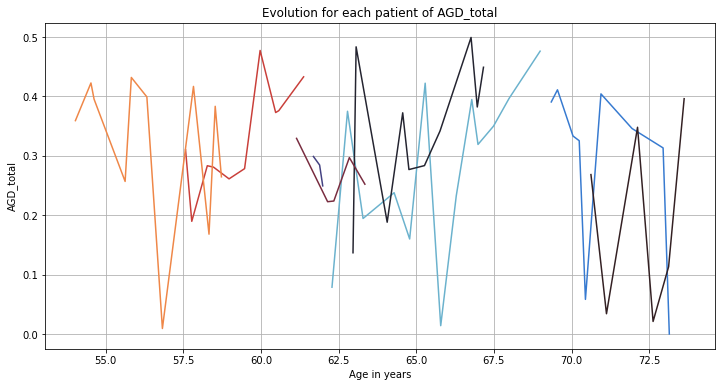

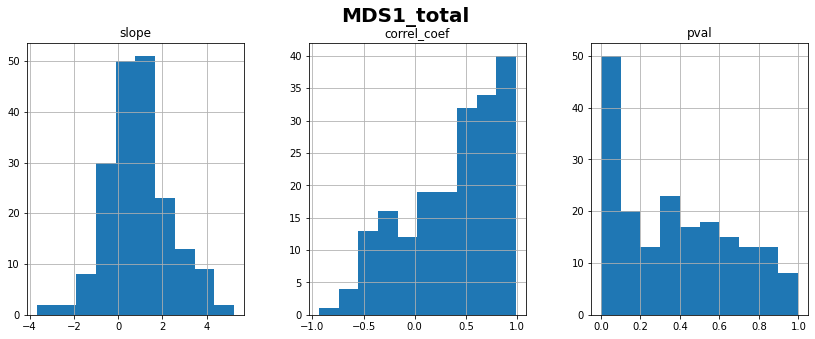

MDS1_total: linear correlation coefficient with time = 0.36 ± 0.45


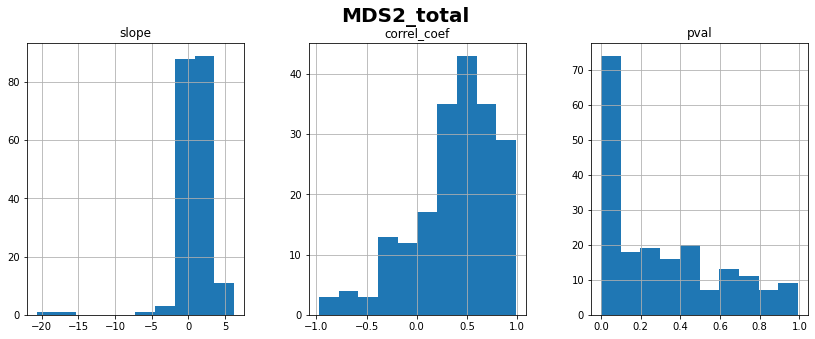

MDS2_total: linear correlation coefficient with time = 0.37 ± 0.42


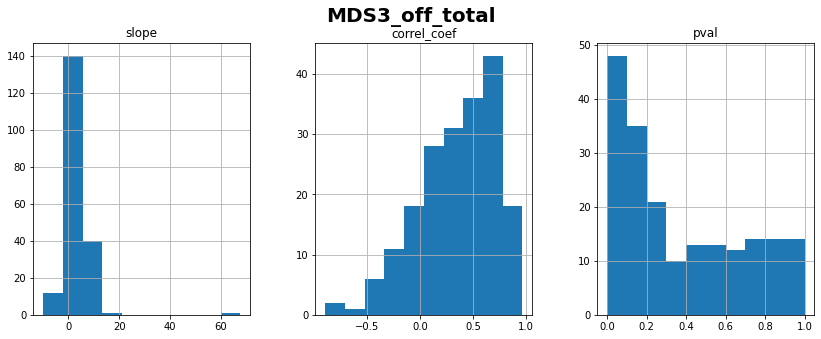

MDS3_off_total: linear correlation coefficient with time = 0.35 ± 0.37


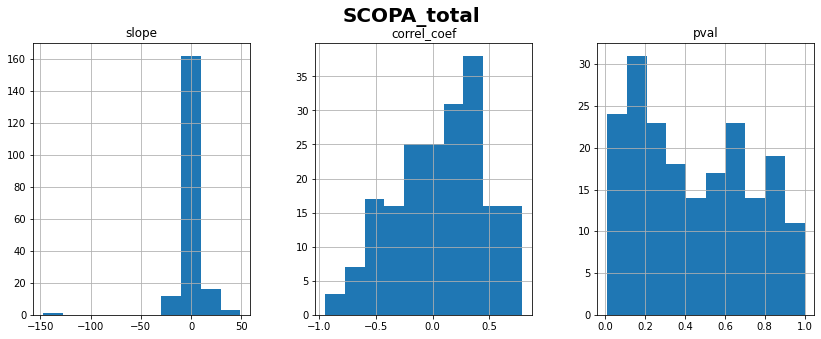

SCOPA_total: linear correlation coefficient with time = 0.08 ± 0.40


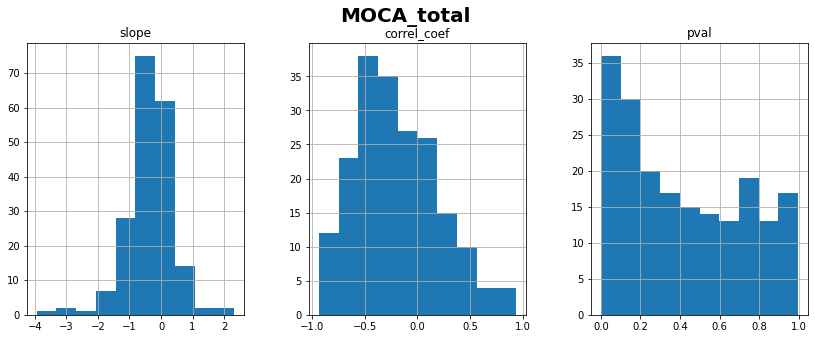

MOCA_total: linear correlation coefficient with time = -0.20 ± 0.39


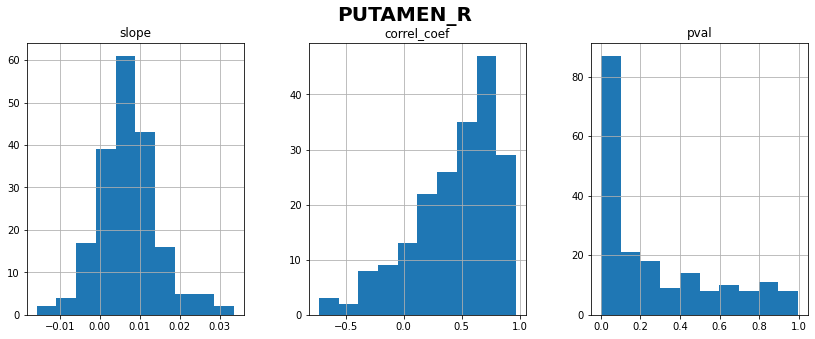

PUTAMEN_R: linear correlation coefficient with time = 0.44 ± 0.37


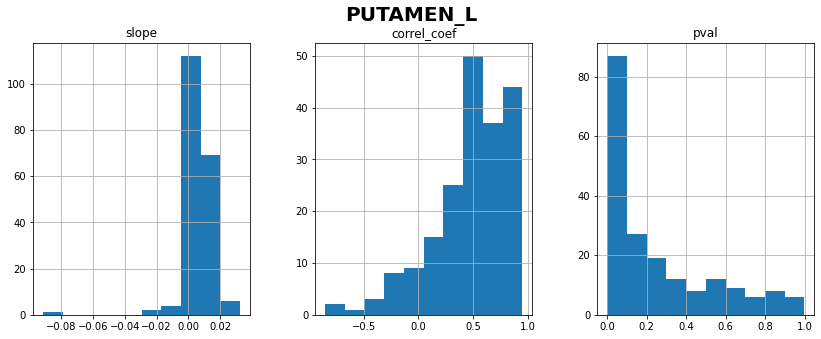

PUTAMEN_L: linear correlation coefficient with time = 0.48 ± 0.35


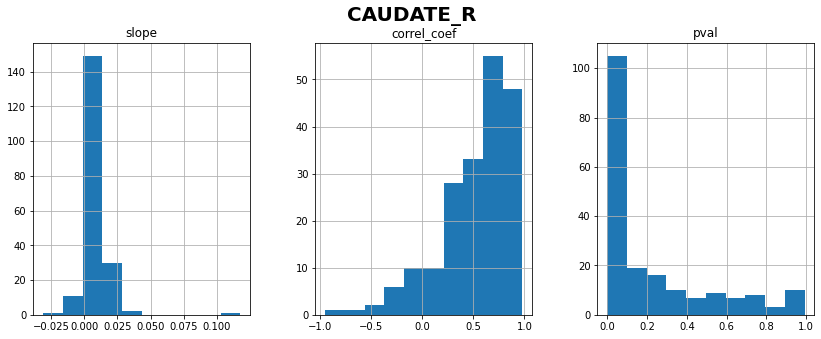

CAUDATE_R: linear correlation coefficient with time = 0.53 ± 0.35


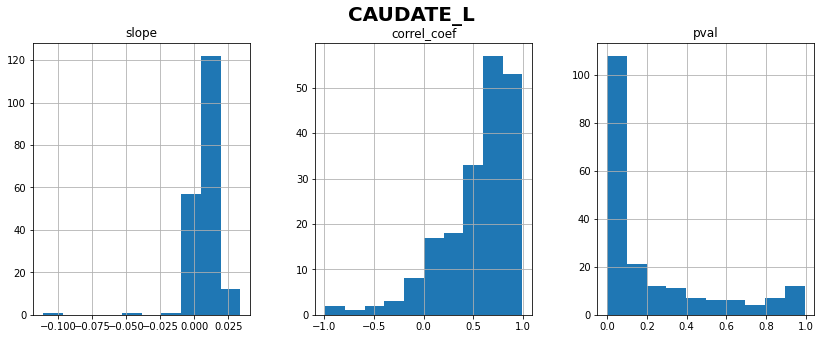

CAUDATE_L: linear correlation coefficient with time = 0.54 ± 0.36


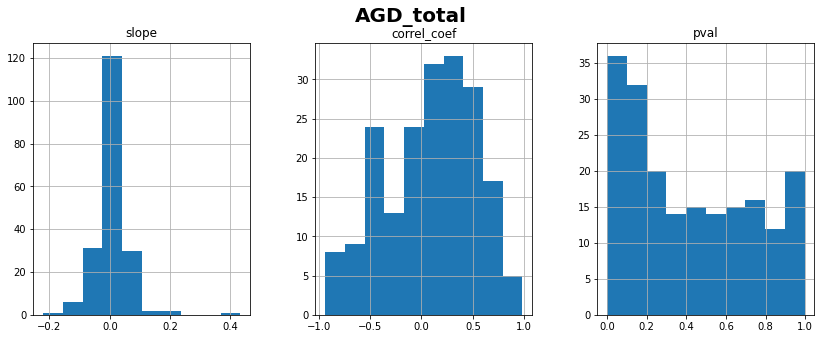

AGD_total: linear correlation coefficient with time = 0.09 ± 0.44


In [88]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

plot_individuals(df, "AGD_total", sublist = df.index.unique('ID')[:8])
plt.grid()
plt.show()

for ft_name, s in df.items():
    
    ilr_ft = individual_linear_regression_against_time(df, ft_name)

    ax = ilr_ft[['slope','correl_coef', 'pval']].hist(figsize=(14,5), layout=(1,3))
    plt.gcf().suptitle(ft_name+'\n', fontweight='bold', fontsize=20)
    plt.show()
    
    print(f"{ft_name}: linear correlation coefficient with time = "
          f"{ilr_ft['correl_coef'].mean():.2f} ± {ilr_ft['correl_coef'].std():.2f}")


<span style='color: #a13203; font-weight: 600;'>💬 Question 8 💬</span> __What do you conclude about AGD_total progression? Should we consider it for longitudinal modeling?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 9 💬</span> __Now that you know the progression of all the features, can you normalize them all now? If not what is the issue and which features are concerned?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 10 💬</span> __Run the code below to split the data into a training and testing set.__

In [89]:
##CREATE TRAINING AND TESTING SETS
patient_stop = 'GS-100'
patient_start = 'GS-101'

df_train = df.loc[:patient_stop].copy()
df_test = df.loc[patient_start:].copy()
df_to_pred = df_vis.loc[patient_start:].copy()

<span style='color: #a13203; font-weight: 600;'>💬 Question 11 💬</span> __Normalize the data using the function below and making sure that you have increasing data at the end.__

In [90]:
def normalize(df, feat, max_, min_, increase = True ):
    df_study = df[feat].copy()
    df_study = (df_study - min_) / (max_ - min_)
    if not increase :
        df_study = 1 - df_study
    return df_study

In [15]:
# To complete

In [91]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

# bounded scores
scores = {
    "MDS1_total": (52, 0, True), # max, min, increase?
    "MDS2_total": (52, 0, True),
    "MDS3_off_total": (132, 0, True),
    "SCOPA_total": (72, 0, True),
    "MOCA_total": (30, 0, False),
    #"AGD_total": #No need we will not use it...
}

for score_name, normalize_args in scores.items():
    df_train.loc[:, score_name] = normalize(df_train, score_name, *normalize_args )
    df_test.loc[:, score_name] = normalize(df_test, score_name, *normalize_args )
    df_to_pred.loc[:, score_name] = normalize(df_to_pred, score_name, *normalize_args )

# imagery (all features are increasing)
for var_name in ['PUTAMEN_R', 'PUTAMEN_L', 'CAUDATE_R', 'CAUDATE_L']:
    
    df_test.loc[:, var_name] = normalize(df_test, var_name, df_train[var_name].max(), 
                                         df_train[var_name].min(), increase = True )

### I.2. Train your model

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Be carefull you have only an __hour and half__ and running a leaspy model on ten features can take a lot of time... We advise you to start by univariate model ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 12 💬</span> __Complete the code below to select the columns you want to use to train your leaspy model.__

In [92]:
# To complete

col = #####################################

data_train = Data.from_dataframe(df_train[col]) 
data_test = Data.from_dataframe(df_test[col])
df_to_pred = df_to_pred

In [93]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

col = ["MDS3_off_total", "MDS2_total"]

data_train = Data.from_dataframe(df_train[col]) 
data_test = Data.from_dataframe(df_test[col])
df_to_pred = df_to_pred

<span style='color: #a13203; font-weight: 600;'>💬 Question 13 💬</span> __Complete the code below to set the parameters you want for your model.__

In [ ]:
# To complete

leaspy_model = ###############
nb_source = ###############
algo_settings = #################

algo_settings.set_logs(path='logs', 
    console_print_periodicity=None,  # If = N, it display logs in the console/terminal every N iterations
    overwrite_logs_folder=True       # Default behaviour raise an error if the folder already exists.
)

##FIT
leaspy = Leaspy(leaspy_model)
leaspy.model.load_hyperparameters({'source_dimension': nb_source})
leaspy.fit(data_train, algorithm_settings=algo_settings)

In [98]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

leaspy_model = "logistic" #'univariate'
nb_source = 1
algo_settings = AlgorithmSettings('mcmc_saem', 
                                  n_iter=3000,           # n_iter defines the number of iterations
                                  progress_bar=True)     # To display a nice progression bar during calibration

algo_settings.set_logs(path='logs', 
    console_print_periodicity=None,  # If = N, it display logs in the console/terminal every N iterations
    overwrite_logs_folder=True       # Default behaviour raise an error if the folder already exists.
)

##FIT
leaspy = Leaspy(leaspy_model)
leaspy.model.load_hyperparameters({'source_dimension': nb_source})
leaspy.fit(data_train, algorithm_settings=algo_settings)

#leaspy = Leaspy.load('./outputs/model_parameters.json')


...overwrite logs folder...
|##################################################|   3000/3000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0582

Calibration took: 2min 48s


<span style='color: #a13203; font-weight: 600;'>💬 Question 14 💬</span> __Evaluate that your model learned well and then save it.__

In [ ]:
# To complete

In [99]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

# Check the logs, the noise std, coherence of model parameters, ...

leaspy.save('./outputs/model_parameters.json', indent=2)

print(leaspy.model.parameters)

from IPython.display import IFrame
IFrame('./logs/plots/convergence_1.pdf', width=990, height=670)

{'g': tensor([0.9264, 1.3880]), 'v0': tensor([-4.4238, -4.1641]), 'betas': tensor([[-0.0449]]), 'tau_mean': tensor(71.3112), 'tau_std': tensor(10.0713), 'xi_mean': tensor(0.), 'xi_std': tensor(0.6131), 'sources_mean': tensor(0.), 'sources_std': tensor(1.), 'noise_std': tensor(0.0582)}


### I.3. Test your model

<span style='color: #a13203; font-weight: 600;'>💬 Question 15 💬</span> __Complete the code below to make the predictions.__

In [ ]:
# To complete

##SET PARAMETERS
settings_personalization = #################

##PREDICTIONS
ip = #################
reconstruction = #################
d2 = {k: v[0] for k, v in reconstruction.items()}
df_pred = pd.DataFrame.from_dict(d2, orient='index', columns = [s+"_model1" for s in col])

In [23]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

##SET PARAMETERS
settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True, use_jacobian=True)

##PREDICTIONS
ip = leaspy.personalize(data_test, settings_personalization)
reconstruction = leaspy.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip)
d2 = {k: v[0] for k, v in reconstruction.items()}
df_pred = pd.DataFrame.from_dict(d2, orient='index', columns = [s+"_model1" for s in col])

|##################################################|   100/100 subjects
The standard deviation of the noise at the end of the personalization is:
0.0567

Personalization scipy_minimize took: 2s


<span style='color: #a13203; font-weight: 600;'>💬 Question 16 💬</span> __Display results of your prediction against real values and the mean absolute error.__

In [ ]:
# To complete

Mean absolute error MDS3_off_total : 0.059690863332327676


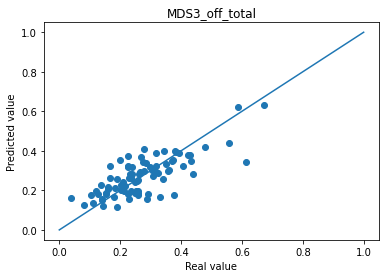

Mean absolute error MDS2_total : 0.05356992930173874


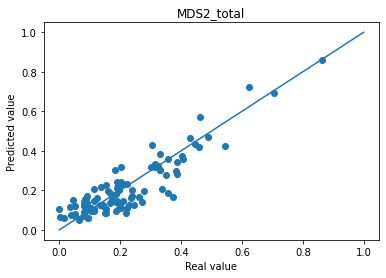

In [24]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

for s in col :
    print("Mean absolute error "+s+" : " + str(np.abs(df_to_pred[s]-df_pred[s+'_model1']).mean()))
    plt.scatter(df_to_pred[s], df_pred[s+'_model1'])
    plt.plot([0,1],[0,1])
    plt.title(s)
    plt.xlabel("Real value")
    plt.ylabel("Predicted value")
    plt.show()

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Note that an average good error is about 5% of absolute error for MDS3_off_total.

## Part II: The cofactor evaluation

Besides prediction, the individual parameters are interesting in the sense that they provide meaningful and interesting insights about the disease progression. For that reasons, these individual parameters can be correlated to other cofactors. Let's consider that you have a covariate Cofactor 1 that encodes a genetic status: 1 if a specific mutation is present, 0 otherwise. Now, let's see if this mutation has an effect on the disease progression. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 17 💬</span> __Complete the code below to see the repartition of carriers and non carriers.__

In [ ]:
# To complete
import seaborn as sns

# —— Convert individual parameters to dataframe
df_ip = ###############

# —— Join the cofactors to individual parameters
cofactor = pd.read_csv(data_path + "cof_leaspy2.csv", index_col=['ID'])
df_ip = df_ip.join(cofactor.replace({'MUTATION':{0: 'Non-carrier', 1: 'Carrier'}}))

_, ax = plt.subplots(1, 2, figsize=(14, 6))

# —— Plot the time shifts in carriers and non-carriers
ax[0].set_title('Time shift histogram')
sns.histplot(data=df_ip, x=..., hue=..., bins=15, ax=ax[0], stat='count', common_norm=False, kde=True)

# —— Plot the acceleration factor in carriers and non-carriers
ax[1].set_title('Log-Acceleration factor histogram')
sns.histplot(data=df_ip, x=..., hue=..., bins=15, ax=ax[0], stat='count', common_norm=False, kde=True)

plt.show()

# __ Joint density (tau, xi) __
g = sns.jointplot(data=..., x=..., y=..., hue=..., height=6)
g.plot_joint(sns.kdeplot, zorder=0, levels=8, bw_adjust=1.5)
g.ax_joint.grid();

# __ Nb of mutated patients ___
df_ip['MUTATION'].value_counts(dropna=False)

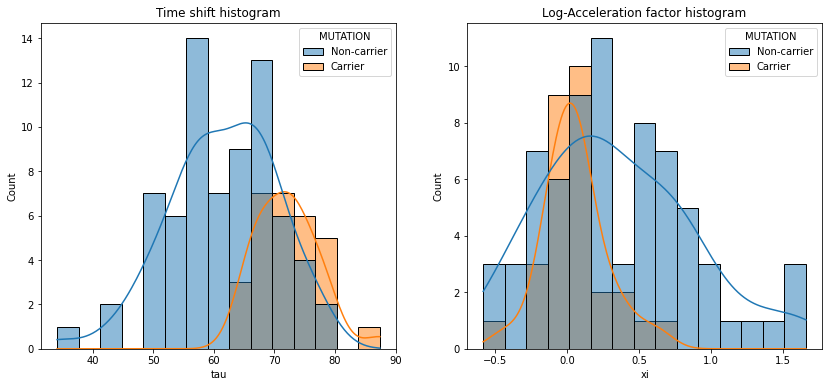

Non-carrier    71
Carrier        29
Name: MUTATION, dtype: int64

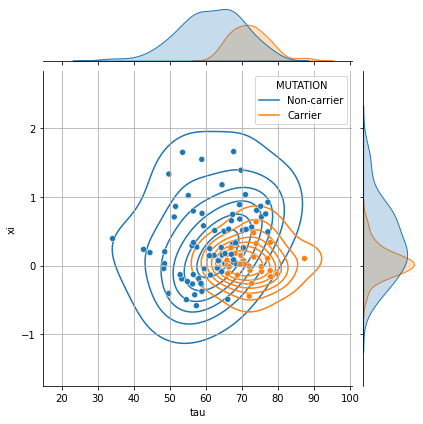

In [29]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

import seaborn as sns

# —— Convert individual parameters to dataframe
df_ip = ip.to_dataframe()

# —— Join the cofactors to individual parameters
cofactor = pd.read_csv(data_path + "cof_leaspy2.csv", index_col=['ID'])
df_ip = df_ip.join(cofactor.replace({'MUTATION':{0: 'Non-carrier', 1: 'Carrier'}}))

_, ax = plt.subplots(1, 2, figsize=(14, 6))

# —— Plot the time shifts in carriers and non-carriers
ax[0].set_title('Time shift histogram')
sns.histplot(data=df_ip, x='tau', hue='MUTATION', bins=15, ax=ax[0], stat='count', common_norm=False, kde=True)

# —— Plot the acceleration factor in carriers and non-carriers
ax[1].set_title('Log-Acceleration factor histogram')
sns.histplot(data=df_ip, x='xi', hue='MUTATION', bins=15, ax=ax[1], stat='count', common_norm=False, kde=True)

plt.show()

# __ Joint density (tau, xi) __
g = sns.jointplot(data=df_ip, x="tau", y="xi", hue="MUTATION", height=6)
g.plot_joint(sns.kdeplot, zorder=0, levels=8, bw_adjust=1.5)
g.ax_joint.grid();

# __ Nb of mutated patients ___
df_ip['MUTATION'].value_counts(dropna=False)

<span style='color: #a13203; font-weight: 600;'>💬 Question 18 💬</span> __Make a statistic tests using `stats.ttest_ind` and `stats.mannwhitneyu`.__

In [ ]:
# To complete

In [34]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

carriers = df_ip[df_ip['MUTATION'] == 'Carrier']
non_carriers = df_ip[df_ip['MUTATION'] == 'Non-carrier']

# —— Student t-test (under the asumption of a gaussian distribution only)
print(stats.ttest_ind(carriers['tau'], non_carriers['tau']))
print(stats.ttest_ind(carriers['xi'], non_carriers['xi']))

# —— Mann-withney t-test
print(stats.mannwhitneyu(carriers['tau'], non_carriers['tau']))
print(stats.mannwhitneyu(carriers['xi'], non_carriers['xi']))

Ttest_indResult(statistic=6.116870627752805, pvalue=1.958990326701787e-08)
Ttest_indResult(statistic=-2.9131535065482375, pvalue=0.004431884326689646)
MannwhitneyuResult(statistic=301.0, pvalue=1.6002231482727975e-08)
MannwhitneyuResult(statistic=662.0, pvalue=0.0026530380825654097)


## Part III: Univariate vs Multivariate

Now that you have a multivariate model that works, let's compare the multivariate and univariate model. For that you will compare a multivariate model with MDS3 and MDS2 with two univariate model MDS2 and MDS3 separatly. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 19 💬</span> __Fit 3 models, one multivariate and two univariate with MDS2 and MDS3.__

In [ ]:
# To complete

leaspy_model_u = ###########################
leaspy_model = ###########################
algo_settings = ###########################

#With MDS2 and MDS3
data_train23 = ###########################
data_test23 = ###########################

leaspy23 = #########
###########################

#With MDS3
data_train3 = ##################
data_test3 = ##################

leaspy3 = ##################
##################

#With MDS2

##########################

In [35]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

leaspy_model_u = 'univariate_logistic'
leaspy_model = "logistic" #'univariate'
algo_settings = AlgorithmSettings('mcmc_saem', 
                                  n_iter=3000,           # n_iter defines the number of iterations
                                  progress_bar=True)     # To display a nice progression bar during calibration

#algo_settings.set_logs(path=...)

#With MDS2 and MDS3
data_train23 = Data.from_dataframe(df_train[["MDS3_off_total", "MDS2_total"]]) 
data_test23 = Data.from_dataframe(df_test[["MDS3_off_total", "MDS2_total"]])

leaspy23 = Leaspy(leaspy_model)
leaspy23.fit(data_train23, algorithm_settings=algo_settings)
leaspy23.save('./outputs/model_parameters_23.json', indent=2)

#With MDS3
data_train3 = Data.from_dataframe(df_train[["MDS3_off_total"]]) 
data_test3 = Data.from_dataframe(df_test[["MDS3_off_total"]])

leaspy3 = Leaspy(leaspy_model_u)
leaspy3.fit(data_train3, algorithm_settings=algo_settings)
leaspy3.save('./outputs/model_parameters_3.json', indent=2)

#With MDS2
data_train2 = Data.from_dataframe(df_train[["MDS2_total"]]) 
data_test2 = Data.from_dataframe(df_test[["MDS2_total"]])

leaspy2 = Leaspy(leaspy_model_u)
leaspy2.fit(data_train3, algorithm_settings=algo_settings)
leaspy2.save('./outputs/model_parameters_2.json', indent=2)


|##################################################|   3000/3000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0583

Calibration took: 53s
|##################################################|   3000/3000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0661

Calibration took: 12s
|##################################################|   3000/3000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0669

Calibration took: 9s


<span style='color: #a13203; font-weight: 600;'>💬 Question 20 💬</span> __Make the predictions for each model.__

In [ ]:
# To complete

##SET PARAMETERS
settings_personalization = #############################

##PREDICTIONS MDS3
ip23 = #############################
reconstruction23 = leaspy23.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip23)
d223 = {k: v[0] for k, v in reconstruction23.items()}
df_pred23 = pd.DataFrame.from_dict(d223, orient='index', columns = ["MDS3_off_total_model_m", "MDS2_total_model_m"])

##PREDICTIONS MDS3
ip3 = #############################
reconstruction3 = leaspy3.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip3)
d23 = {k: v[0] for k, v in reconstruction3.items()}
df_pred3 = pd.DataFrame.from_dict(d23, orient='index', columns = ["MDS3_off_total_model_u"])

##PREDICTIONS MDS3
#############################

#CONCATE PREDICTIONS
df_pred_mu = pd.concat([df_pred23, df_pred3, df_pred2], axis = 1)

In [100]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

##SET PARAMETERS
settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True, use_jacobian=True)

##PREDICTIONS MDS3
ip23 = leaspy23.personalize(data_test23, settings_personalization)
reconstruction23 = leaspy23.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip23)
d223 = {k: v[0] for k, v in reconstruction23.items()}
df_pred23 = pd.DataFrame.from_dict(d223, orient='index', columns = ["MDS3_off_total_model_m", "MDS2_total_model_m"])

##PREDICTIONS MDS3
ip3 = leaspy3.personalize(data_test3, settings_personalization)
reconstruction3 = leaspy3.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip3)
d23 = {k: v[0] for k, v in reconstruction3.items()}
df_pred3 = pd.DataFrame.from_dict(d23, orient='index', columns = ["MDS3_off_total_model_u"])

##PREDICTIONS MDS3
ip2 = leaspy2.personalize(data_test2, settings_personalization)
reconstruction2 = leaspy2.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip2)
d22 = {k: v[0] for k, v in reconstruction2.items()}
df_pred2 = pd.DataFrame.from_dict(d22, orient='index', columns = ["MDS2_total_model_u"])

#CONCATE PREDICTIONS
df_pred_mu = pd.concat([df_pred23, df_pred3, df_pred2], axis = 1)

|##################################################|   100/100 subjects
The standard deviation of the noise at the end of the personalization is:
0.0569

Personalization scipy_minimize took: 3s
|##################################################|   100/100 subjects
The standard deviation of the noise at the end of the personalization is:
0.0687

Personalization scipy_minimize took: 1s
|##################################################|   100/100 subjects
The standard deviation of the noise at the end of the personalization is:
0.0707

Personalization scipy_minimize took: 1s


<span style='color: #a13203; font-weight: 600;'>💬 Question 21 💬</span> __Display results of predictions against real values and the mean absolute error.__

In [ ]:
# To complete

Mean absolute error MDS3_off_total_model_m : 0.05958525082644294


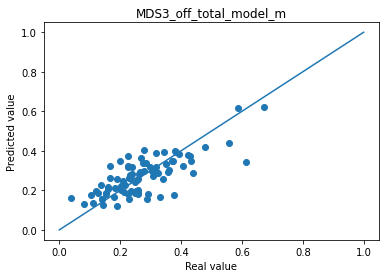

Mean absolute error MDS3_off_total_model_u : 0.06501929260352078


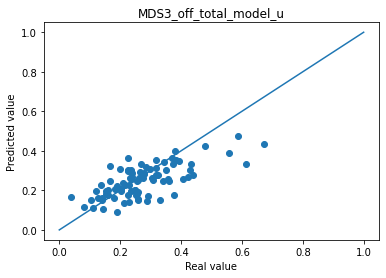

Mean absolute error MDS2_total_model_m : 0.05325222294777632


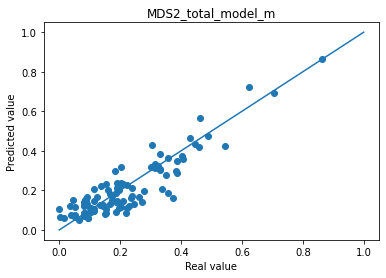

Mean absolute error MDS2_total_model_u : 0.0676489770412445


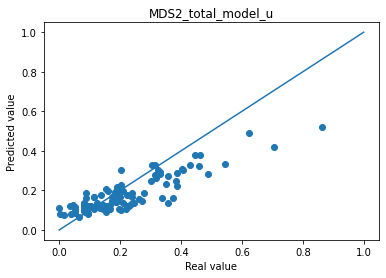

In [101]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #
col_plot = ['MDS3_off_total_model_m', 'MDS3_off_total_model_u', 'MDS2_total_model_m', 'MDS2_total_model_u']
col_real = ['MDS3_off_total', 'MDS3_off_total','MDS2_total', 'MDS2_total']
for i in range(len(col_plot)) :
    print("Mean absolute error "+col_plot[i]+" : " + str(np.abs(df_to_pred[col_real[i]]-df_pred_mu[col_plot[i]]).mean()))
    plt.scatter(df_to_pred[col_real[i]], df_pred_mu[col_plot[i]])
    plt.plot([0,1],[0,1])
    plt.title(col_plot[i])
    plt.xlabel("Real value")
    plt.ylabel("Predicted value")
    plt.show()

## Part IV: Get the best model as you can
